WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
D:\Anaconda\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\Anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\Anaconda\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
D:\Anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\Anaconda\lib\site-packages\theano\scalar\basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2045 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
D:\Anaconda\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


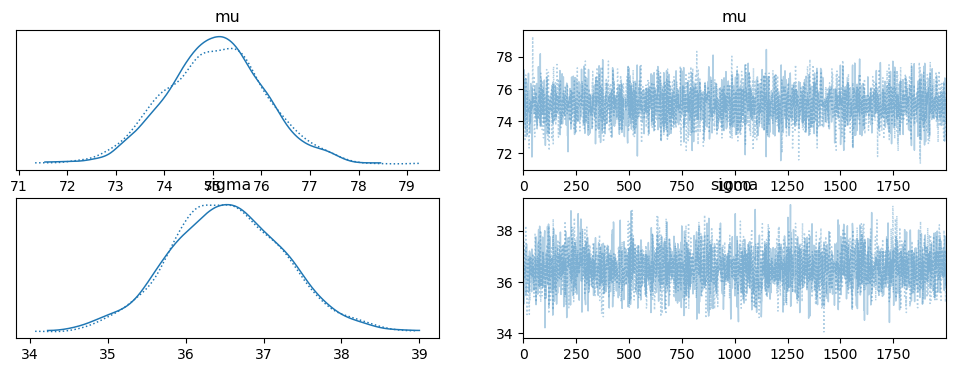

In [2]:
#From CSV build Bayesian model
import pandas as pd
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

def build_bayesian_model(csv_file_path):
    # Read data from the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Extract the "Close/Last" column as your observed data
    observed_data = data['Close/Last']
    
    # Define the PyMC3 model
    with pm.Model() as model:
        # Define prior distributions for your model parameters
        # For example, you can use Normal distributions for mean and standard deviation
        mu = pm.Normal('mu', mu=observed_data.mean(), sd=observed_data.std())
        sigma = pm.HalfNormal('sigma', sd=observed_data.std())
        
        # Likelihood function
        likelihood = pm.Normal('likelihood', mu=mu, sd=sigma, observed=observed_data)
        
        # Use PyMC3 to perform Bayesian inference
        trace = pm.sample(2000, tune=1000, cores=1)  # You can adjust the number of samples and tuning steps
        
    # Return the PyMC3 model and trace
    return model, trace

# Usage example:
model, trace = build_bayesian_model('F:\inputs\stocks\GH.CSV')

def plot_trace(trace):
    # Use ArviZ to create trace plots
    az.plot_trace(trace)
    plt.show()

# Usage example:
plot_trace(trace)
